# CS319  Week 06  : Experimental Algorithm Analysis (in Python)

In this notebook we will
* revise  using  'numpy' nad `numpy`  arrays;
* do a little plotting with `matplotlib`. 
* I'll assume you know about f-strings

## `numpy`

`numpy` (pronoucned "/numb-pee/" or "/numb-pie/") is the primary module for working with arrays of data in Python.

We use the word `array` in the same sense it is used in C++: it is a collection of items all of the same data type. Working with numpy arrays is MUCH faster than with lists. 

There are two reasons why
1. It is easy to locate any element in memory. 
2. Most of the data types and functions are actually implemented in C++, rather than Python.

### Loading the module

To use `numpy` you must import the module. By convention, this is done as:

In [1]:
import numpy as np

There are lots of ways of creating an `numpy` array. For example, to make an array from a list, use the `np.array()` function:

In [2]:
N=np.array([4, 8, 16, 32, 64, 128, 256, 512])
type(N)

numpy.ndarray

In [3]:
T=np.array([8.9400e-03, 2.2367e-03, 5.5930e-04, 1.3983e-04, 3.4958e-05, 8.7396e-06, 2.1849e-06, 5.4622e-07])
print(f"Contents of T: {T}")
print(f"T is of type{type(T)}")

Contents of T: [8.9400e-03 2.2367e-03 5.5930e-04 1.3983e-04 3.4958e-05 8.7396e-06
 2.1849e-06 5.4622e-07]
T is of type<class 'numpy.ndarray'>


Use the `dtype` method to check what the underlying type of the data is:

In [4]:
print(f"Data in T is of type {T.dtype}")
print(f"Data in N is of type {N.dtype}")

Data in T is of type float64
Data in N is of type int64


## Functions of numpy arrays

One of the many benefits of using `numpy` is that we can avoid writing explicit loops, since `numpy` comes with functions that map arrays to other arrays.

Example:

In [5]:
print(N)
print(np.log2(N))

[  4   8  16  32  64 128 256 512]
[2. 3. 4. 5. 6. 7. 8. 9.]


Also, standard operators such as `+` and `*` can be used with these arrays:

In [6]:
N+N

array([   8,   16,   32,   64,  128,  256,  512, 1024])

In [7]:
T*N*N # spoiler!!!!

array([0.14304   , 0.1431488 , 0.1431808 , 0.14318592, 0.14318797,
       0.14318961, 0.14318961, 0.1431883 ])

## Analysing the Quadrature Data



We'll need the `matplotlib` library, as well as `numpy`

In [8]:
import numpy as np
import matplotlib.pyplot as plt

We copy some data computed by `00CheckConvergence.cpp`
* `N` is the set of numbers of intervals used in the calculations
* `T` is the set of values of `E_N` for the Trapezium Rule.

In [9]:
N=np.array([4, 8, 16, 32, 64, 128, 256, 512])
T=np.array([8.940076e-03, 2.236764e-03, 5.593001e-04, 1.398319e-04, 3.495839e-05, 8.739624e-06, 2.184908e-06, 5.462270e-07])

Plot the data, using `matplotlib`

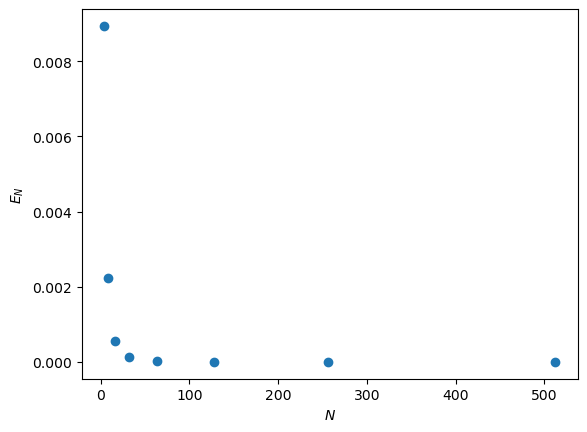

In [10]:
plt.plot(N, T, 'o')
plt.xlabel('$N$')
plt.ylabel('$E_N$')
plt.show()

That last figure is not very informative...
* on the horizontal axes, the data are too spread out
* on the vertical axis the data is too compressed near $T=0$.

We resolve this by using logarithmic axes:

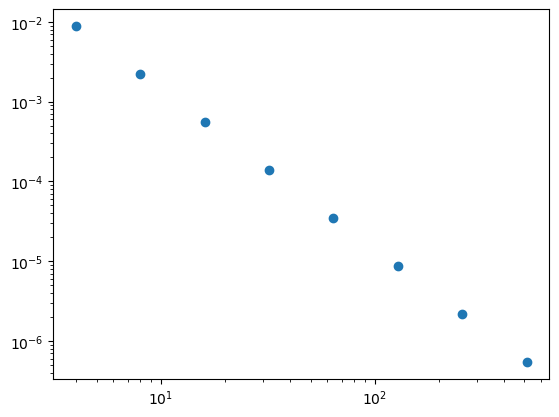

In [11]:
plt.loglog(N, T, 'o')
plt.show()

Looks like a straight line!

As discussed in class, $E_N \approx C N^{-q}$. Then, if we set
* `Y = log(T)`, 
* `X = log(N)`, and
* `K = log(C)`,\
we get $Y \approx K - qT$. We have $Y$ and $X$, so we want to estimate $K$ and $q$, which are the slope and $Y$-intercept of the line. 

We'll use the (depreciated) `np.polyfit()` function to compute the coefficients of the line that best fits (in a least squares sense) the points $(X, Y)$. 

If we set `A=polyfit(x,y,n)` then `A` is a np.array with the coefficients of the polynomial of degree $n$ that best approximates the points $(x,y)$. That is 
$y \approx A[0] x^n + A[1] x^{n-1} + \dots + A[-1]$.

In [12]:
X = np.log(N); Y = np.log(T)
Fit = np.polyfit( X, Y,1)
q = -Fit[0];
K = Fit[1];
print(f'We get K={K} and q={q}');

We get K=-1.9443306386200654 and q=1.9998490653205538


We can now recover the value of $C$

In [13]:
C = np.exp(K)
print(f'C={C : .3f} and q={q : .3f}');

C= 0.143 and q= 2.000


Let's plot to check:

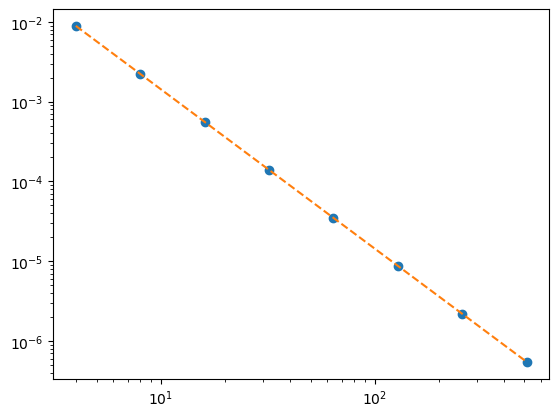

In [14]:
plt.loglog(N, T, 'o', N, C*N**(-q), '--')
plt.show()